# Implementierung Algae Modell

## Bibs und packages 

In [81]:
from copy import deepcopy

In [82]:
%load_ext autoreload
%autoreload 2 
# from mempyDEB.DEBIBM import test
from mempyDEB.DEBIBM.simulators import * # imports functions to run models
from mempyDEB.DEBIBM.defaultparams import * # imports default parameters
from mempyDEB.DEBIBM.model import * #import model
import mempyDEB
#mempyDEB.__file__

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Tes Algae model alone 

In [ ]:
p = deepcopy(defaultparams_DEBIBM)
#p.glb['tspan'] = (0,14)
p.glb['N_0']= 0 #No Daphnia 
#p.glb['data_collection_interval']=1 #in order to track shorter tie intervalls 
#p.glb['tres']=24

In [ ]:
sim = simulate_DEBIBM(p) # runs the baseline model (a variant of DEBkiss)
mout, aout = sim 
mout.head(10) #see results

100%|██████████| 3/3 [00:00<00:00,  3.94it/s]


,index,t_day,X,Q,P,N_tot,M_tot,aging_mortality,starvation_mortality,toxicity_mortality,replicate,C_W
0,0,0.0,2.000000,0.100000,2.000000,0,0.0,0,0,0,0,0.0
1,1,0.0,2.098393,0.096356,1.967386,0,0.0,0,0,0,0,0.0
2,2,1.0,6.420783,0.053827,1.334037,0,0.0,0,0,0,0,0.0
3,3,2.0,17.694828,0.126111,0.854165,0,0.0,0,0,0,0,0.0
4,4,3.0,49.831838,0.403718,0.330993,0,0.0,0,0,0,0,0.0
5,5,4.0,133.394490,0.575685,0.010632,0,0.0,0,0,0,0,0.0
6,6,5.0,195.759981,0.492538,0.003871,0,0.0,0,0,0,0,0.0
7,7,6.0,178.597069,0.437660,0.004552,0,0.0,0,0,0,0,0.0
8,8,7.0,163.332718,0.404153,0.005394,0,0.0,0,0,0,0,0.0
9,9,8.0,153.896455,0.383816,0.006045,0,0.0,0,0,0,0,0.0


Visualize Algae (X), Phosphorus content in the algae population (Q) and extern phosphorus (P). <br> 
Assumptions: <br>
- No Chemichal effect yet, <br>


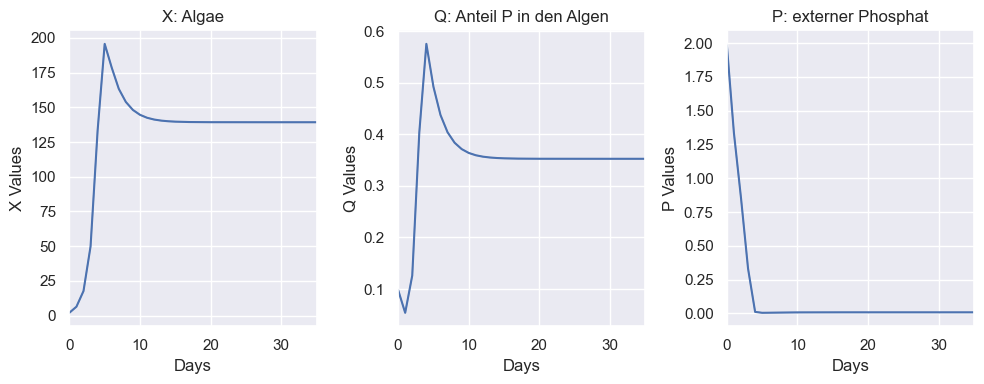

In [ ]:
fig, ax = plt.subplots(ncols = 3, figsize = (10,4))

sns.lineplot(data=mout, x='t_day',y='X', ax= ax[0] )
ax[0].set_title('X: Algae')
ax[0].set_xlabel('Days')
ax[0].set_ylabel('X Values')
ax[0].set_xlim(0,35)

sns.lineplot(data=mout, x='t_day',y='Q', ax= ax[1] )
ax[1].set_title('Q: Anteil P in den Algen')
ax[1].set_xlabel('Days')
ax[1].set_ylabel('Q Values')
ax[1].set_xlim(0,35)

sns.lineplot(data=mout, x='t_day',y='P', ax= ax[2] )
ax[2].set_title('P: externer Phosphat')
ax[2].set_xlabel('Days')
ax[2].set_ylabel('P Values')
ax[2].set_xlim(0,35)

plt.tight_layout()
plt.show()

Test and visualize effekt of chemichals in the the algae population: 

In [84]:
C_W_vals = [0, 100, 200, 500] 
sim_chem = exposure_DEBIBM(p, C_W_vals)
mout_c, aout_C = sim_chem 


100%|██████████| 3/3 [00:01<00:00,  1.64it/s]


In [76]:
mout_c

,index,t_day,X,Q,P,N_tot,M_tot,aging_mortality,starvation_mortality,toxicity_mortality,replicate,C_W
0,0,0.0,2.000000,0.100000,2.000000,0,0.0,0,0,0,0,0.0
1,1,0.0,2.098393,0.096356,1.967386,0,0.0,0,0,0,0,0.0
2,2,1.0,6.420783,0.053827,1.334037,0,0.0,0,0,0,0,0.0
3,3,2.0,17.694828,0.126111,0.854165,0,0.0,0,0,0,0,0.0
4,4,3.0,49.831838,0.403718,0.330993,0,0.0,0,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
361,361,360.0,139.289765,0.352673,0.007327,0,0.0,0,0,0,2,10.0
362,362,361.0,139.289765,0.352673,0.007327,0,0.0,0,0,0,2,10.0
363,363,362.0,139.289765,0.352673,0.007327,0,0.0,0,0,0,2,10.0
364,364,363.0,139.289765,0.352673,0.007327,0,0.0,0,0,0,2,10.0


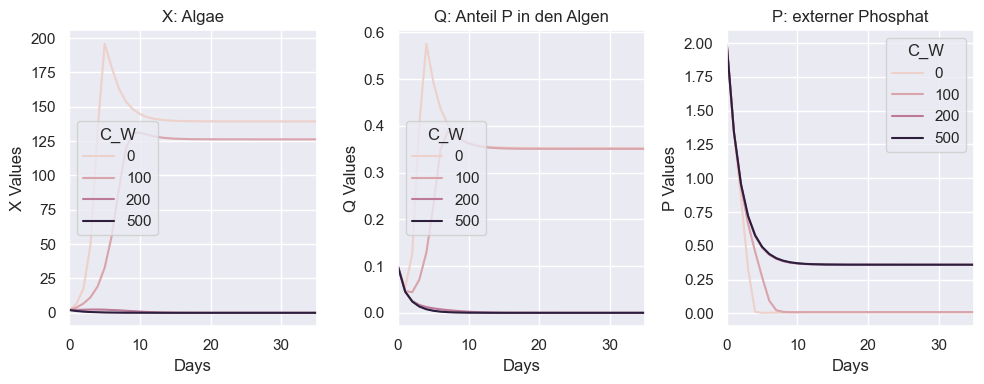

In [85]:
fig, ax = plt.subplots(ncols = 3, figsize = (10,4))

sns.lineplot(data=mout_c, x='t_day',y='X', ax= ax[0], hue='C_W' )
ax[0].set_title('X: Algae')
ax[0].set_xlabel('Days')
ax[0].set_ylabel('X Values')
ax[0].set_xlim(0,35)

sns.lineplot(data=mout_c, x='t_day',y='Q', ax= ax[1], hue='C_W' )
ax[1].set_title('Q: Anteil P in den Algen')
ax[1].set_xlabel('Days')
ax[1].set_ylabel('Q Values')
ax[1].set_xlim(0,35)

sns.lineplot(data=mout_c, x='t_day',y='P', ax= ax[2], hue='C_W' )
ax[2].set_title('P: externer Phosphat')
ax[2].set_xlabel('Days')
ax[2].set_ylabel('P Values')
ax[2].set_xlim(0,35)

plt.tight_layout()
plt.show()